In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

#Load Dataset

In [2]:
df = pd.read_csv("Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Prapemrosesan Data

Rekayasa Fitur

In [3]:
df = (df-df.min()) / (df.max() - df.min())
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0


In [4]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

Pembuatan Data Set

In [5]:
fold1_trainingset = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][0:614]
fold1_testingset = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][614:768]

fold1 = [fold1_trainingset, fold1_testingset]

fold2_trainingset = pd.concat([df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][0:461],
                    df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome']][614:768]])
fold2_testingset = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][461:614]

fold2 = [fold2_trainingset, fold2_testingset]

fold3_trainingset = pd.concat([df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][0:307],
                    df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome']][461:768]])
fold3_testingset = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][307:461]

fold3 = [fold3_trainingset, fold3_testingset]

fold4_trainingset = pd.concat([df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][0:154],
                    df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome']][307:768]])
fold4_testingset = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][154:307]

fold4 = [fold4_trainingset, fold4_testingset]

fold5_trainingset = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][154:768]
fold5_testingset = df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']][0:154]

fold5 = [fold5_trainingset, fold5_testingset]

In [6]:
df_fold = [fold1, fold2, fold3, fold4, fold5]

for item in df_fold:
    print(len( item[0]), len(item[1]))

614 154
615 153
614 154
615 153
614 154


In [7]:
df_fold

[[     Pregnancies   Glucose  ...       Age  Outcome
  0       0.352941  0.743719  ...  0.483333      1.0
  1       0.058824  0.427136  ...  0.166667      0.0
  2       0.470588  0.919598  ...  0.183333      1.0
  3       0.058824  0.447236  ...  0.000000      0.0
  4       0.000000  0.688442  ...  0.200000      1.0
  ..           ...       ...  ...       ...      ...
  609     0.058824  0.557789  ...  0.033333      0.0
  610     0.176471  0.532663  ...  0.050000      0.0
  611     0.176471  0.874372  ...  0.250000      1.0
  612     0.411765  0.844221  ...  0.316667      1.0
  613     0.352941  0.527638  ...  0.083333      0.0
  
  [614 rows x 9 columns],      Pregnancies   Glucose  ...       Age  Outcome
  614     0.647059  0.693467  ...  0.483333      1.0
  615     0.176471  0.532663  ...  0.100000      0.0
  616     0.352941  0.587940  ...  0.150000      0.0
  617     0.117647  0.341709  ...  0.033333      0.0
  618     0.529412  0.562814  ...  0.483333      1.0
  ..           ... 

#KNN

In [8]:
def euclidean(x1, x2):
    return np.linalg.norm(x1-x2, axis=1)

In [9]:
def predict(x, data_train, k, distance_fn):
    X, y        = data_train
    dist        = distance_fn(x, X)
    nearest_idx = dist.argsort()[:k]
    y_pred      = y[nearest_idx]
    y_pred      = np.bincount(y_pred).argmax()
    return y_pred

#K-FOLD

In [10]:
def accuracy(y, y_pred):
    acc = (y == y_pred).mean()
    return acc

In [11]:
k_observe = [1, 3, 5, 7]
# obsmin = 1
# obsmax = 50
# k_observe = range(obsmin, obsmax)
acc_fold = []
n_fold = 5

for i in range(n_fold):

    X_val = df_fold[i][1].drop("Outcome", axis=1).to_numpy()
    y_val = df_fold[i][1]["Outcome"].to_numpy().astype("int")

    X_train = df_fold[i][0].drop("Outcome", axis=1).to_numpy()
    y_train = df_fold[i][0]["Outcome"].to_numpy().astype("int")

    data_train = (X_train, y_train)

    acc = []
    for k in k_observe:
        y_pred = []
        for x in X_val:
            y_hat = predict(x, data_train, k, euclidean)
            y_pred.append(y_hat)
        y_pred = np.array(y_pred)

        acc_k = accuracy(y_val, y_pred)
        print('fold=%d, k=%d, acc=%0.2f' % (i, k, acc_k))

        acc.append(acc_k)

    acc_fold.append(acc)

fold=0, k=1, acc=0.68
fold=0, k=3, acc=0.72
fold=0, k=5, acc=0.73
fold=0, k=7, acc=0.76
fold=1, k=1, acc=0.72
fold=1, k=3, acc=0.77
fold=1, k=5, acc=0.78
fold=1, k=7, acc=0.79
fold=2, k=1, acc=0.69
fold=2, k=3, acc=0.73
fold=2, k=5, acc=0.73
fold=2, k=7, acc=0.77
fold=3, k=1, acc=0.67
fold=3, k=3, acc=0.67
fold=3, k=5, acc=0.67
fold=3, k=7, acc=0.69
fold=4, k=1, acc=0.73
fold=4, k=3, acc=0.75
fold=4, k=5, acc=0.78
fold=4, k=7, acc=0.77


In [12]:
acc_fold = np.array(acc_fold)
acc_fold

array([[0.67532468, 0.72077922, 0.73376623, 0.75974026],
       [0.71895425, 0.77124183, 0.78431373, 0.79084967],
       [0.69480519, 0.73376623, 0.72727273, 0.76623377],
       [0.67320261, 0.66666667, 0.66666667, 0.68627451],
       [0.73376623, 0.75324675, 0.77922078, 0.76623377]])

In [13]:
acc_mean = acc_fold.mean(axis=0)
acc_mean.argmax()

3

In [14]:
idx_max = np.where(acc_mean == acc_mean.max())[0][0]
print("k terbaik dari observasi dengan",k_observe,"yaitu ada pada k =",idx_max,"dan nilai akurasinya adalah : ",acc_mean.max())

k terbaik dari observasi dengan [1, 3, 5, 7] yaitu ada pada k = 3 dan nilai akurasinya adalah :  0.7538663950428657


In [15]:
print('Nilai akurasi tiap fold dengan observasi',k_observe)
i = 0
while i < len(acc_fold):
    element = acc_fold[i]
    print("Fold ke-",i,': ',acc_fold[i].mean())
    i = i + 1
print('Rerata akurasi yang didapat pada observasi',k_observe,'adalah',acc_fold.mean())

Nilai akurasi tiap fold dengan observasi [1, 3, 5, 7]
Fold ke- 0 :  0.7224025974025974
Fold ke- 1 :  0.7663398692810457
Fold ke- 2 :  0.7305194805194805
Fold ke- 3 :  0.673202614379085
Fold ke- 4 :  0.7581168831168831
Rerata akurasi yang didapat pada observasi [1, 3, 5, 7] adalah 0.7301162889398183


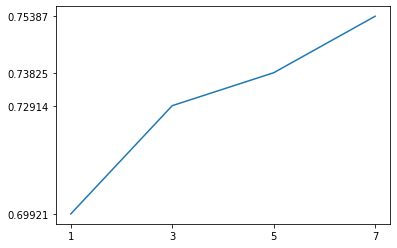

In [16]:
plt.plot(k_observe, acc_mean)
plt.xticks(k_observe)
plt.yticks(acc_mean)
plt.show()